<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_chd/blob/main/CHD_Catherine's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Catherine's Part:
planning doc: https://docs.google.com/document/d/14Bk8fK8Z3aloL-LonYbPN_R9QM4kLc_0UJYO15-o8WE/edit

In [35]:
import pandas as pd

train_data = pd.read_csv('fhs_train.csv')
test_data = pd.read_csv('fhs_test.csv')


# Clean & Transform Data

In [36]:
train_data.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [ ]:
test_data.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,674,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,4070,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,3150,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,1695,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,2692,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


Check columns and values to get a idea of the columns we are working with.

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# check to see how many unique values there are in the 'Unnamed: 0' column
train_data['Unnamed: 0'].value_counts()

1267    1
322     1
2301    1
1143    1
3915    1
       ..
4214    1
2066    1
3695    1
1716    1
691     1
Name: Unnamed: 0, Length: 3180, dtype: int64

In [37]:
# drop 'Unnamed: 0' column as it is not listed in the data dictionary and it serves no person.
train_data1 = train_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
train_data1.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [38]:
# drop columns that we don't need to analyze
train_final = train_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
                                 'diabetes', 'totChol', 'sysBP',
                                 'diaBP', 'BMI', 'TenYearCHD']]
train_final.columns

Index(['sex', 'currentSmoker', 'cigsPerDay', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'TenYearCHD'],
      dtype='object')

In [15]:
# make sure na rows are dropped
train_final1 = train_final.dropna()
na_count = train_final1.isna().sum()

print(na_count)

sex              0
currentSmoker    0
cigsPerDay       0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
TenYearCHD       0
dtype: int64


### Do the same for cleaning/transforming for test data.

In [12]:
test_data.columns

Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# check to see how many unique values there are in the 'Unnamed: 0' column
test_data['Unnamed: 0'].value_counts()

674     1
2344    1
938     1
2975    1
2928    1
       ..
2563    1
2258    1
2864    1
1907    1
115     1
Name: Unnamed: 0, Length: 1060, dtype: int64

In [8]:
# drop 'Unnamed: 0' column as it is not listed in the data dictionary and it serves no person.
test_data1 = train_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
test_data1.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Check each individual column for any weird outliers/values that don't make sense in the dataset.

In [ ]:
# columns chosen for analysis: 9 variables
# ['sex', 'currentSmoker', 'cigsPerDay', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'TenYearCHD']

In [ ]:
test_data1['sex'].unique()

array([1, 0])

In [ ]:
test_data1['currentSmoker'].unique()

array([0, 1])

In [ ]:
test_data1['cigsPerDay'].unique()

array([ 0., 15., 43., 20.,  9.,  3., 10., 40.,  5., nan, 25., 18.,  6.,
        2., 30.,  1.,  8.,  7., 12., 23., 35., 29., 11., 16., 14., 60.,
       70., 19.,  4., 45., 50., 17., 38., 13.])

In [ ]:
test_data1['diabetes'].unique()

array([0, 1])

In [ ]:
test_data1['totChol'].unique()

array([220., 199., 275., 170., 202., 232., 237., 254., 332., 259., 229.,
       315., 257., 214., 261., 210., 309., 247., 193., 285., 179., 184.,
       207., 256., 180., 301., 240., 152., 219., 290., 311., 148., 276.,
       160., 194., 252., 230., 201., 322., 238., 288., 246., 267., 283.,
       228., 186., 159., 277., 342., 292., 213., 270., 185., 175., 233.,
       336., 171., 221., 218., 225., 263., 216., 200., 187., 340., 273.,
       241., 296., 212., 196., 192., 354., 260., 189., 258., 250., 334.,
       183., 265., 209., 195., 243., 222., 271., 289., 347., 321., 150.,
       299., 206., 167., 165., 302., 231., 266., 204., 223., 272., 198.,
       236., 235., 215., 156., 155., 300., 217., 280., 245., 262., 305.,
       306., 269., 203., 390., 325., 211., 242., 350., 314., 323., 234.,
       190., 287., 328., 268., 188., 304., 205., 294., 174., 297., 293.,
       278.,  nan, 227., 172., 329., 249., 244., 178., 154., 248., 239.,
       251., 286., 226., 346., 153., 312., 282., 25

In [ ]:
test_data1['sysBP'].unique()

array([143. , 122. , 112. , 130. , 124. , 126. , 171.5, 138. , 114. ,
       134.5, 100.5, 135. , 117.5, 133. , 142. , 120. , 131. , 113. ,
       110. , 131.5, 101. ,  96. , 102.5, 127.5, 116. , 162. , 146. ,
       115. , 127. , 140.5, 132. , 112.5, 145. , 148. , 141. , 150. ,
        99. , 195. , 107.5, 109. , 116.5, 165. , 149. , 183. ,  93.5,
       140. , 124.5, 193. , 122.5, 119. , 102. , 134. , 132.5, 128. ,
       141.5, 111. , 106. , 129. , 178. , 125. , 136. , 137.5, 151.5,
       153. , 125.5, 188. , 174. , 142.5, 157. , 111.5, 113.5, 192.5,
       105.5, 146.5, 160. , 147. , 158. , 214. , 151. , 152. , 155.5,
       155. , 144. , 117. , 121. , 105. , 115.5, 160.5, 137. , 126.5,
       118. , 190. , 184.5,  94. , 180. , 147.5, 108. , 199. , 130.5,
       119.5,  95. , 118.5, 175. , 154. , 152.5, 197. , 103. , 150.5,
       139. , 100. , 133.5, 143.5, 173. , 107. , 123. , 220. , 168.5,
       187. , 106.5, 205. , 164.5,  98. , 108.5, 172.5, 185. , 163. ,
       159. , 120.5,

In [ ]:
test_data1['diaBP'].unique()

array([104. ,  82. ,  71. ,  94. ,  92. ,  83. , 105.5,  96. ,  76. ,
        87. ,  66. ,  80. ,  82.5,  86. ,  90. ,  85. ,  68. ,  77.5,
        68.5,  72. ,  72.5,  81.5,  91. ,  84. ,  78. ,  75. ,  66.5,
        76.5,  95. ,  77. ,  93. ,  70. ,  62. , 100. , 110. ,  73. ,
        81. ,  62.5, 108. ,  58. ,  92.5,  79. ,  69. ,  89.5,  85.5,
       103. ,  61. ,  88. , 106. ,  71.5,  63.5,  97. , 104.5,  98. ,
        74. , 113. ,  60. ,  57.5,  73.5,  86.5,  65. , 109. , 102. ,
        99.5,  84.5,  80.5,  70.5,  78.5,  90.5,  74.5,  67.5,  67. ,
        88.5,  89. ,  99. ,  97.5,  50. , 118. ,  63. ,  79.5,  98.5,
       128. , 107.5, 130. ,  87.5, 105. , 101. ,  91.5, 124. , 123. ,
       107. ,  94.5, 106.5, 100.5, 111. ,  75.5,  64. , 103.5, 115. ,
       121. ,  95.5,  57. ,  64.5, 119. , 112. , 102.5,  93.5,  83.5,
       129. ,  69.5, 120. ,  59. , 109.5,  55. ,  96.5, 112.5, 133. ,
        54. , 115.5,  65.5, 114. , 125. ,  52. , 110.5, 135. ,  59.5,
       116. , 108.5,

In [ ]:
test_data1['BMI'].unique()

array([29.85, 22.16, 25.68, ..., 37.04, 38.31, 26.78])

In [ ]:
test_data1['TenYearCHD'].unique()

array([1, 0])

In [13]:
# drop columns that we don't need to analyze
test_final = test_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
                                 'diabetes', 'totChol', 'sysBP',
                                 'diaBP', 'BMI', 'TenYearCHD']]
test_final.columns

Index(['sex', 'currentSmoker', 'cigsPerDay', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'TenYearCHD'],
      dtype='object')

In [14]:
# make sure na rows are dropped
test_final1 = test_final.dropna()
na_count_test = test_final1.isna().sum()

print(na_count_test)

sex              0
currentSmoker    0
cigsPerDay       0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
TenYearCHD       0
dtype: int64


## The 'train_final1' and 'test_final1' are the cleaned/transformed dfs we will be working with.

<Axes: xlabel='cigsPerDay', ylabel='TenYearCHD'>

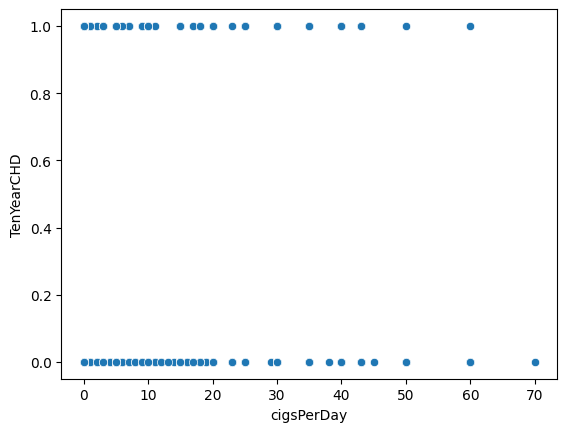

In [39]:
import seaborn as sns
sns.scatterplot(data=train_final1,x='cigsPerDay',y='TenYearCHD')

In [40]:
train_final1['cigsPerDay'].describe()

count    3102.000000
mean        8.960993
std        12.006022
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [41]:
nan_count = train_final1.isna().sum()

print("Number of NaNs:")
print(nan_count)

Number of NaNs:
sex              0
currentSmoker    0
cigsPerDay       0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
TenYearCHD       0
dtype: int64


# Multiple Linear Regression

- Analyze all variables, see which hold the most predictive significance
- Narrow down and run regression again
- Check for overfitting and underfitting
- Check for normality and variance


In [42]:
train_final1.head()

,sex,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,TenYearCHD
0,1,0,0.0,0,220.0,143.0,104.0,29.85,1
1,0,1,15.0,0,199.0,122.0,82.0,22.16,0
2,0,0,0.0,0,275.0,112.0,71.0,25.68,0
3,1,1,43.0,0,170.0,130.0,94.0,23.90,0
4,0,0,0.0,0,202.0,124.0,92.0,21.26,0


In [22]:
import numpy as np
import matplotlib.pyplot as plt

## MLR #1: on all variables under consideration

In [69]:
from sklearn.linear_model import LinearRegression # Import linear regression model

vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI'] # This is a list of variables to use

X = train_final1.loc[:,vars] # Construct data matrix
y = train_final1['TenYearCHD']
X.head() # Peek at data

,sex,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI
0,1,0,0.0,0,220.0,143.0,104.0,29.85
1,0,1,15.0,0,199.0,122.0,82.0,22.16
2,0,0,0.0,0,275.0,112.0,71.0,25.68
3,1,1,43.0,0,170.0,130.0,94.0,23.90
4,0,0,0.0,0,202.0,124.0,92.0,21.26


In [70]:
reg = LinearRegression().fit(X, y) # Fit the linear model
print('Intercept: ', reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print('Rsq: ', reg.score(X, y)) # R squared measure

Intercept:  -0.3434208947917229
[ 0.07358509 -0.02471788  0.00205701  0.16672109  0.00054387  0.00422422
 -0.00278582 -0.00021608]
Rsq:  0.06989504171206573


In [71]:
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

,variable,coefficient
0,sex,0.073585
1,currentSmoker,-0.024718
2,cigsPerDay,0.002057
3,diabetes,0.166721
4,totChol,0.000544
5,sysBP,0.004224
6,diaBP,-0.002786
7,BMI,-0.000216


From this MLR, we can see that the variable "diabetes" has the highest coefficient at 0.166, followed by "sex" as second highest at 0.073. The variable with the lowest coefficient is the "totChol" at 0.0005 and the second lowest is "cigsPerDay" at 0.002.
- The higher the coefficient, the more impact this feature has on the dependent variable which in this case is risk of coronary heart disease.

The next two MLR will compare the effects of excluding variables with little significance (low coefficients) to excluding variables with high significance and impact on varying the dependent variable (risk of CHD). The first MLR will calculate the Rsq value when excluding the two variables with the lowest coefficients. The second MLR will calculate the Rsq when excluding the two variables with the highest coefficients.

## MLR #2: using all variables EXCLUDING the two variables with the lowest coefficients (totChol and cigsPerDay) to see how much of an impact there will be on the Rsq value.

In [72]:
vars2 = ['sex','currentSmoker','diabetes','sysBP','diaBP','BMI']
X2 = train_final1.loc[:,vars2] # Construct data matrix
y = train_final1['TenYearCHD']
X2.head() # Peek at data

,sex,currentSmoker,diabetes,sysBP,diaBP,BMI
0,1,0,0,143.0,104.0,29.85
1,0,1,0,122.0,82.0,22.16
2,0,0,0,112.0,71.0,25.68
3,1,1,0,130.0,94.0,23.90
4,0,0,0,124.0,92.0,21.26


In [74]:
reg2 = LinearRegression().fit(X2, y) # Fit the linear model
print('Intercept: ', reg2.intercept_) # Intercept value
print(reg2.coef_) # Regression coefficients
print('Rsq: ', reg2.score(X2, y)) # R squared measure

Intercept:  -0.25648337106842045
[ 0.07900868  0.01278906  0.1678622   0.00447308 -0.00285853  0.00026813]
Rsq:  0.06360574536541608


In [77]:
results2 = pd.DataFrame({'variable':reg2.feature_names_in_, 'coefficient': reg2.coef_}) # Regression coefficients
results2

,variable,coefficient
0,sex,0.079009
1,currentSmoker,0.012789
2,diabetes,0.167862
3,sysBP,0.004473
4,diaBP,-0.002859
5,BMI,0.000268


The Rsq values is less as you take away variables. In this case, the variables "totChol" and "cigsPerDay" are taken away which decreases the Rsq value from 0.06989 to 0.063605 meaning there is a decrease of 0.006285.

## MLR #3: using all variables EXCLUDING the two variables with the highest coefficients (sex and diabetes) to see how much of an impact there will be on the Rsq value.

In [78]:
vars3 = ['currentSmoker','cigsPerDay','totChol','sysBP','diaBP','BMI']
X3 = train_final1.loc[:,vars3] # Construct data matrix
y = train_final1['TenYearCHD']
X3.head() # Peek at data

,currentSmoker,cigsPerDay,totChol,sysBP,diaBP,BMI
0,0,0.0,220.0,143.0,104.0,29.85
1,1,15.0,199.0,122.0,82.0,22.16
2,0,0.0,275.0,112.0,71.0,25.68
3,1,43.0,170.0,130.0,94.0,23.90
4,0,0.0,202.0,124.0,92.0,21.26


In [79]:
reg3 = LinearRegression().fit(X3, y) # Fit the linear model
print('Intercept: ', reg3.intercept_) # Intercept value
print(reg3.coef_) # Regression coefficients
print('Rsq: ', reg3.score(X3, y)) # R squared measure

Intercept:  -0.3528989781168923
[-0.03185679  0.0032627   0.00049743  0.0041524  -0.00250073  0.00115769]
Rsq:  0.05520126404447723


In [80]:
results3 = pd.DataFrame({'variable':reg3.feature_names_in_, 'coefficient': reg3.coef_}) # Regression coefficients
results3

,variable,coefficient
0,currentSmoker,-0.031857
1,cigsPerDay,0.003263
2,totChol,0.000497
3,sysBP,0.004152
4,diaBP,-0.002501
5,BMI,0.001158


The Rsq values is less as you take away variables. In this case, the variables "sex" and "diabetes" are taken away which decreases the Rsq value from 0.06989 to 0.05520 meaning there is a decrease of 0.01469.
- Note that this decrease in Rsq is less when we take away variables. More specifically, the R squared decrease increases when we take away variables of significance (high coefficients) than variables with low coeffficients in the MLR. For example, when we take away the two highest coefficients and run the MLR, the R squared decrease is 0.01469 compared to taking away the two lowest coefficient the R squared is 0.006285, which is a lot less. The variance explained by the independent variables decreases with less variables in the model, and thus results in a lower R squared value.

# Test model using test data 'test_final1"

In [68]:
test_final1.head()

,sex,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,TenYearCHD
0,1,0,0.0,0,220.0,143.0,104.0,29.85,1
1,0,1,15.0,0,199.0,122.0,82.0,22.16,0
2,0,0,0.0,0,275.0,112.0,71.0,25.68,0
3,1,1,43.0,0,170.0,130.0,94.0,23.90,0
4,0,0,0.0,0,202.0,124.0,92.0,21.26,0


In [81]:
 # import sklean module to use LinearRegression method and fit()
from sklearn import linear_model

In [84]:
# define X_train, X_test, y_train, y_test
X_train = train_final1[['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI']]
y_train = train_final1['TenYearCHD']

X_test = test_final1[['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI']]
y_test = test_final1['TenYearCHD']

In [88]:
# Run a regression of 'TenYearCHD' on 'sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP',and 'BMI'
# fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
print('Intercept: ', reg.intercept_) # Intercept value
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(results)

Intercept:  -0.3434208947917229
        variable  coefficient
0            sex     0.073585
1  currentSmoker    -0.024718
2     cigsPerDay     0.002057
3       diabetes     0.166721
4        totChol     0.000544
5          sysBP     0.004224
6          diaBP    -0.002786
7            BMI    -0.000216


In [90]:
pred_test = model.predict(X_test)
print("Prediction for test set: {}".format(pred_test))

Prediction for test set: [0.15770363 0.05307555 0.07591364 ... 0.21471887 0.08868702 0.26051964]


In [91]:
# Actual values vs. predicted values
difference = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_test})
difference.head()

,Actual value,Predicted value
0,1,0.157704
1,0,0.053076
2,0,0.075914
3,0,0.168473
4,0,0.029355


In [92]:
rmse = np.sqrt( np.mean( (y_test - pred_test)**2 ))
print('RMSE: ', rmse) # R2

RMSE:  0.34609479182890446


In [95]:
print('R squared: ')
print(model.score(X_test, y_test)) # R squared measure

R squared: 
0.06989504171206573


As seen by the r squared value of the test data and the actual vs. predicted response variable dataframe called 'difference' above, we can see that Multiple Linear Regression is not the best method to use for predicting a binary reponse variable like TenYearCHD. MLR makes the assumption that the reponse variable is continues, not a binary 0 or 1 (like the response variable "TenYearCHD" we are looking at is).

### Main conclusions from this file:

1.
2.
3.